# Обзор необходимых алгоритмов ML и нейронных сетей
## Линейные модели

In [ ]:
# !pip install -U scikit-learn pandas numpy matplotlib Pillow

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bioinf/ML_immuno/seminar_1/heart_data.tsv', sep='\t')

In [ ]:
data.head(10)

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прием лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,0,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,0,0,0,0,0,0,0,0,0,0,Курит,15.0,20.0,0,NaN,употребляю в настоящее время,18.0,22:00:00,06:00:00,0,0,0,0,0,0,0,0
1,1,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,1,0,0,0,0,0,0,1,0,1,Никогда не курил(а),NaN,NaN,0,NaN,никогда не употреблял,NaN,00:00:00,04:00:00,1,0,0,1,1,0,0,0
2,2,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),NaN,NaN,1,1-2 раза в неделю,употребляю в настоящее время,17.0,23:00:00,07:00:00,0,0,0,0,0,0,0,0
3,3,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,0,0,1,0,0,0,0,1,0,0,Бросил(а),12.0,10.0,1,3-6 раз в неделю,употребляю в настоящее время,13.0,23:00:00,07:00:00,0,0,0,1,0,0,0,0
4,4,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,1,1,1,0,0,0,0,0,1,0,1,Никогда не курил(а),NaN,NaN,1,не менее 1 раза в день,употребляю в настоящее время,16.0,23:00:00,06:00:00,0,0,0,1,0,1,1,0
5,5,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),NaN,NaN,0,NaN,употребляю в настоящее время,35.0,23:00:00,06:00:00,0,0,0,0,0,0,0,0
6,6,Ж,гражданский брак / проживание с партнером,европейская,Русские,Христианство,2 - начальная школа,служащие,1,0,0,0,1,0,0,0,0,0,1,0,1,Никогда не курил(а),NaN,NaN,0,NaN,никогда не употреблял,NaN,23:00:00,05:30:00,0,0,0,0,0,0,0,0
7,7,М,гражданский брак / проживание с партнером,европейская,Азербайджанцы,Ислам,4 - профессиональное училище,низкоквалифицированные работники,0,1,1,0,0,0,0,0,0,0,1,0,0,Бросил(а),18.0,1.0,1,1-2 раза в неделю,употребляю в настоящее время,12.0,23:00:00,06:00:00,0,0,0,0,0,1,0,0
8,8,Ж,гражданский брак / проживание с партнером,европейская,Русские,Христианство,4 - профессиональное училище,служащие,1,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),NaN,NaN,0,NaN,употребляю в настоящее время,17.0,23:00:00,07:00:00,0,0,0,0,0,0,0,1
9,9,М,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,1,0,0,0,0,0,0,0,0,0,0,0,0,Никогда не курил(а),NaN,NaN,0,NaN,употребляю в настоящее время,18.0,23:00:00,08:00:00,0,1,0,0,0,0,0,0


In [ ]:
targets = ['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность',
           'Прочие заболевания сердца']

В данном случае от нас требуется по данным о человеке научиться предсказывать наличие у него Артериальной гипертензии, Острого нарушения мозгового кровообращения, Стенокардии, ИБС, инфаркта миокарда, Сердечной недостаточности и Прочих заболеваний сердца.  

In [ ]:
data.describe()

,ID,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прием лекарственных средств,Травмы за год,Переломы,Возраст курения,Сигарет в день,Пассивное курение,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,412.000000,409.000000,955.000000,788.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,477.000000,0.523560,0.335079,0.048168,0.105759,0.120419,0.045026,0.075393,0.042932,0.020942,0.002094,0.642932,0.053403,0.353927,20.300971,14.220049,0.234555,20.038071,0.226178,0.068063,0.023037,0.467016,0.042932,0.122513,0.100524,0.090052
std,275.829053,0.499706,0.472265,0.214232,0.307690,0.325621,0.207470,0.264162,0.202810,0.143267,0.045739,0.479386,0.224954,0.478437,8.039846,10.154710,0.423942,5.177517,0.418575,0.251986,0.150098,0.499172,0.202810,0.328049,0.300854,0.286407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,6.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,477.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,10.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,715.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,21.000000,20.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,954.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,58.000000,60.000000,1.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Узнаем, сколько в каждом столбце пропущенных значений. Метод `isna()` вернет нам таблицу, состоящую из `True` или `False` для каждого элемента, в зависимости от того находится ли там `NaN`. А метод `sum()` просуммирует элементы в столбцах этой таблицы так, будто `True` это `1`, а `False` это `0`.

In [ ]:
data.isna().sum()

ID                                          0
Пол                                         1
Семья                                       0
Этнос                                       0
Национальность                              0
Религия                                     0
Образование                                 0
Профессия                                   0
Работа                                      0
Выход на пенсию                             0
Прекращение работы по болезни               0
Сахарный диабет                             0
Гепатит                                     0
Онкология                                   0
Хроническое заболевание легких              0
Бронхиальная астма                          0
Туберкулез легких                           0
ВИЧ/СПИД                                    0
Регулярный прием лекарственных средств      0
Травмы за год                               0
Переломы                                    0
Статус Курения                    

Узнаем, сколько в каждом столбце уникальных значений. Для этого воспользуемся методом `nunique()`. Можно заметить, что подавляющее количество столбцов содержит только два различных значения. При этом один столбец содержит столько же различных значений, сколько элементов в таблице.

In [ ]:
data.nunique()

ID                                        955
Пол                                         2
Семья                                       6
Этнос                                       3
Национальность                             18
Религия                                     4
Образование                                 4
Профессия                                  11
Работа                                      2
Выход на пенсию                             2
Прекращение работы по болезни               2
Сахарный диабет                             2
Гепатит                                     2
Онкология                                   2
Хроническое заболевание легких              2
Бронхиальная астма                          2
Туберкулез легких                           2
ВИЧ/СПИД                                    2
Регулярный прием лекарственных средств      2
Травмы за год                               2
Переломы                                    2
Статус Курения                    

Давайте обучим нашу модель только на числовых признаках без пропущенных значений.

Сначала отберем столбцы, тип которых принадлежит к `np.number` (например, `int64`, `float64` и тд.)

In [ ]:
numerical_data = data.select_dtypes(include=np.number)

Затем бессердечно отбросим все столбцы в которых есть хоть одно пропущенное значение. Чтобы отбрасывались именно столбцы, а не строки, подадим аргумент `axis=1`.

In [ ]:
perfect_data = numerical_data.dropna(axis=1)

In [ ]:
perfect_data

,ID,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прием лекарственных средств,Травмы за год,Переломы,Пассивное курение,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,4,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
951,951,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
952,952,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
953,953,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


Возьмем все полученные признаки, за исключением целевых.
И попытаемся построить модель для предсказания Артериальной гипертензии.

In [ ]:
features = perfect_data.columns.drop(targets)
target = targets[0]
target

'Артериальная гипертензия'

Самый простой способ валидации включает в себя создание отложенной выборки при помощи метода `train_test_split`. Дополнительно о кросс-валидации [ссылке](https://scikit-learn.org/stable/modules/cross_validation.html).

In [ ]:
from sklearn.model_selection import train_test_split

Первой идет последовательность данных, которые мы хотим разбить на подвыбодки. В нашем случае мы подадим туда целиком таблицу `perfect_data`. Но можно подавать и произвольное количество таблиц или векторов одинаковой длинны. Например, отдельно признаки и целевые значения.  
Далее идет несколько именованных аргументов:
* `test_size` и `train_size` - два взаимозависимых параметра. Можно указывать целочисленные значения, означающие количество объектов, которые попадут в соответствующую подвыборку, или вещественные числа в диапазоне от `0.0` до `1.0`, означающие пропорцию данных в соответствующей подвыборке. Если ничего не указывать, то размер тестовой выборки будет по умолчанию `0.25`. Сумма значений данных аргументов не должна приводить к попытке семплирования большего количества объектов, чем есть в изначальной выборке. Но можно меньше.
* `shuffle` - стоит ли перемешать перед разбиением. Необходимо, например, если ваши данные упорядочены в таблице по некоторому принципу и вы хотите независимое от этого принципа разбиение. По умолчанию `True`.
* `random_state` - сид для генератора случайных чисел. Нужен для того, чтобы при `shuffle=True` разбиение всегда было одинаковым и ваши эксперименты обладали воспроизводимостью.
* `stratify` - данный аргумент принимает целевые значения и позволяет сохранить пропорцию целевых значений между вашими подвыборками. Это помогает избежать ситуации, когда почти все элементы одного класса попали исключительно в одну из подвыборок.

In [ ]:
train, test = train_test_split(perfect_data,
                               train_size=0.8,
                               random_state=42,
                               shuffle=True,
                               stratify=perfect_data[target])

При выборе пропорции между тестовой и обучающей выборками, следует учитывать несколько факторов:

Размер доступного набора данных: Если у вас есть большой объем данных, вы можете выделить большую часть для обучения модели и оставить меньшую часть для тестирования. Например, 70% для обучения и 30% для тестирования. Однако, если у вас есть ограниченный объем данных, рекомендуется выбрать более равномерное разделение, чтобы обеспечить надежную оценку производительности модели.

Желаемая достоверность оценки: Если вы хотите получить более точную оценку производительности модели, более крупная тестовая выборка может быть полезна. В этом случае, например, можно выбрать пропорцию 80% для обучения и 20% для тестирования.

Сложность модели и размер обучающей выборки: Если у вас есть сложная модель, которая требует большого количества данных для обучения, вы можете увеличить размер обучающей выборки. В таких случаях пропорция 60% для обучения и 40% для тестирования может быть разумным выбором.

Важность обобщения: Если вам важна способность модели обобщать на новые, ранее не виданные данные, рекомендуется увеличить размер тестовой выборки. Например, 70% для обучения и 30% для тестирования.

В результате мы получили две таблицы с 80% и 20% строк наших данных и одинаковым набором столбцов.

In [ ]:
train.shape, test.shape

((764, 23), (191, 23))

Многие из вас помнят такой метод восстановления зависимости между двумя переменными как линейная регрессия. Однако перед нами сейчас стоит задача классификации (нет гипертензии / есть гипертензия). Поэтому мы воспользуемся моделью с противоречивым названием **Логистическая регрессия**.
$$\sigma(w_0 + \sum_{i}w_i * x_i)$$

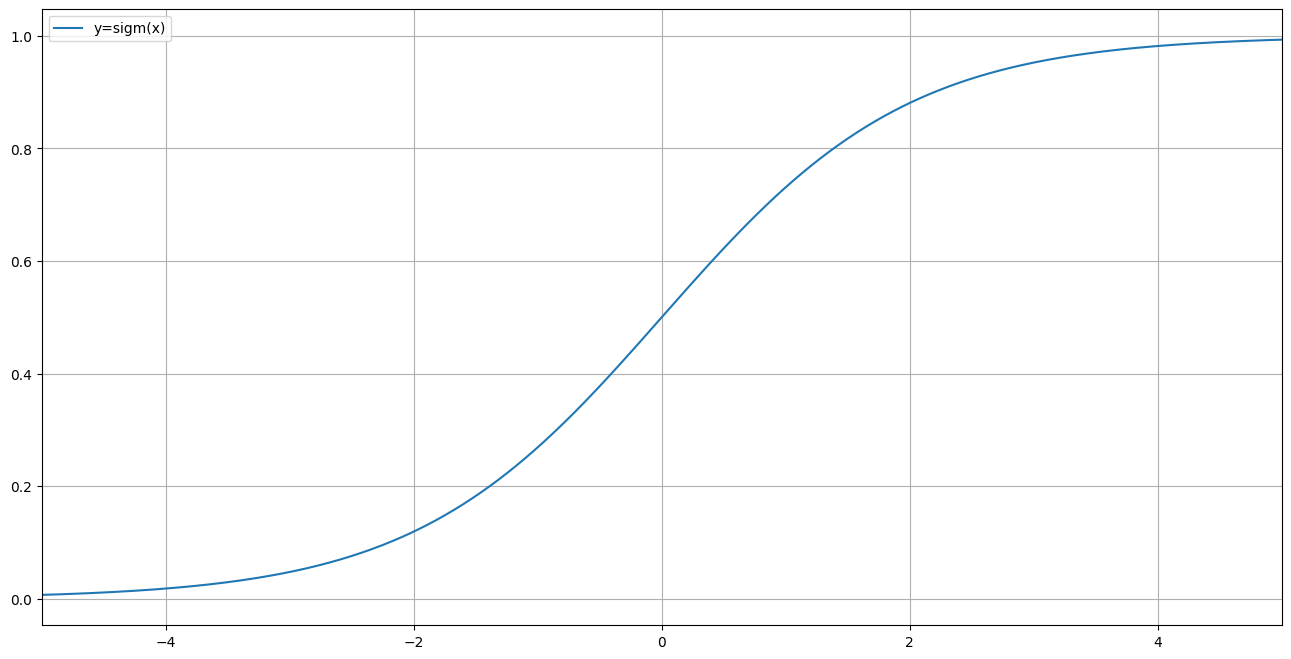

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))


x = np.linspace(-6, 6, 1000)
plt.figure(figsize=(16, 8))
plt.plot(x, sigmoid(x), label='y=sigm(x)')
plt.xlim([-5, 5])
plt.legend()
plt.grid()
plt.show()

Подобрав коэффициенты можно найти гиперплоскость, которая наилучшим образом линейно разделяет наши данные. Благо, вам для этого не придется самостоятельно реализовывать градиентные методы второго порядка.

Чуть более формальную выжимку про линейные классификаторы можете прочитать по [ссылке](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80).  

Про линейные модели доступные в sklearn можно почитать по [ссылке](https://scikit-learn.org/stable/modules/linear_model.html).

Линейные классификаторы - это семейство алгоритмов машинного обучения, которые используются для решения задач классификации. Они называются линейными, потому что строят гиперплоскость (линию, плоскость или гиперплоскость), которая разделяет данные разных классов.

Вот несколько простых объяснений о некоторых типах линейных классификаторов:

Логистическая регрессия: Логистическая регрессия - это линейный классификатор, который используется для решения задач бинарной классификации (когда нужно разделить данные на два класса). Он строит линию (или гиперплоскость), которая разделяет два класса, и применяет логистическую функцию для преобразования выхода в вероятность принадлежности к классу.

Метод опорных векторов (SVM): Метод опорных векторов также является линейным классификатором, но он строит гиперплоскость с максимальным зазором между классами. Он выбирает опорные векторы - точки данных, находящиеся ближе всего к границе разделения классов, и оптимизирует расстояние между этими опорными векторами и гиперплоскостью.

Линейный дискриминантный анализ (LDA): Линейный дискриминантный анализ также является линейным классификатором, который строит гиперплоскость, максимально разделяющую классы, но он также учитывает статистические свойства данных. Он моделирует распределение данных каждого класса и использует его для принятия решений о принадлежности данных к определенному классу.

Все эти методы используют линейные модели для классификации данных, но каждый из них имеет свои особенности и предположения. Выбор подходящего линейного классификатора зависит от свойств данных и требований вашей конкретной задачи.


А какие типы моделей доступны в sklearn ?
Библиотека scikit-learn (sklearn) предоставляет широкий спектр моделей для решения различных задач машинного обучения. Вот некоторые из наиболее распространенных типов моделей, доступных в scikit-learn:

Линейные модели:

Линейная регрессия (Linear Regression)
Логистическая регрессия (Logistic Regression)
Метод опорных векторов для регрессии и классификации (Support Vector Machines - SVM)
Деревья решений и ансамбли моделей:

Деревья решений (Decision Trees)
Случайный лес (Random Forests)
Градиентный бустинг (Gradient Boosting) с помощью библиотеки XGBoost или LightGBM
AdaBoost (AdaBoost)
Наивные байесовские модели:

Наивный Байес (Naive Bayes)
Методы кластеризации:

K-средних (K-Means)
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Иерархическая кластеризация (Hierarchical Clustering)
Нейронные сети:

Многослойный персептрон (MLP)
Сверточные нейронные сети (Convolutional Neural Networks - CNN)
Рекуррентные нейронные сети (Recurrent Neural Networks - RNN)
Размерностные снижение:

Метод главных компонент (Principal Component Analysis - PCA)
t-распределение стохастического соседства (t-distributed Stochastic Neighbor Embedding - t-SNE)
Методы обучения без учителя:

Метод опорных векторов для выбора объектов (Support Vector Machines - SVM)
Универсальный метод кластеризации с помощью находчивого алгоритма (Affinity Propagation)

In [ ]:
from sklearn.linear_model import LogisticRegression

Некоторые методы оптимизации (`solver`) для логистической регрессии тоже имеют стохастическую природу, поэтому не стоит забывать про `random_state`. С оптимизатором по умолчанию (`lbfgs`) он не нужен, но если вы будете менять оптимизатор (например, на поддерживающий разные `penalty` оптимизатор `saga`), то не забывайте об этом.

In [ ]:
classifier = LogisticRegression(random_state=42)

Обучим нашу модель, подав в метод `fit()` признаки и целевую переменную нашей тренировочной выборки.

In [ ]:
classifier.fit(train[features], train[target]);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Данное предупреждение говорит нам о том, что алгоритм не сошелся за количество итераций по умолчанию (100). Можно поставить больше итераций, однако в данном случае мы найдем другой способ повлиять на сходимость.

Теперь получим бинарные предсказания нашей модели методом `predict()`. Он вернет нам результаты логистической функции бинаризованные по порогу 0.5. Если же мы хотим получить "вероятности" принадлежности к классу, то можно воспользоваться методом `predict_proba()`.

In [ ]:
train_preds = classifier.predict(train[features])
test_preds = classifier.predict(test[features])

Оценивать наши модели будем при помощи *точности* - `accuracy` (иногда переводят *аккуратность*, чтобы избежать коллизии с переводом `precision`) и *сбалансированной точности* `balanced accuracy`, которая является средней полнотой для каждого класса и позволяет оценивать модели при дисбалансе классов.
Есть еще много других мер качества, которые позволяют бороться с дисбалансом классов и не только (например, `roc auc`, `pr auc`, `mcc` и тд.). Вы можете ознакомиться с ними [тут](https://scikit-learn.org/stable/modules/model_evaluation.html) и [тут](https://neptune.ai/blog/balanced-accuracy).

$$Accuracy = \frac{Correct}{All}$$
$$Balanced Accuracy = \frac{\sum_{i=1,N}Recall_i}{N}$$

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [ ]:
print(f'Accuracy on train set           {accuracy_score(train[target], train_preds):.5f}')
print(f'Balanced Accuracy on train set  {balanced_accuracy_score(train[target], train_preds):.5f}')

print(f'Accuracy on test set           {accuracy_score(test[target], test_preds):.5f}')
print(f'Balanced Accuracy on test set  {balanced_accuracy_score(test[target], test_preds):.5f}')

Accuracy on train set           0.71204
Balanced Accuracy on train set  0.71390
Accuracy on test set           0.73822
Balanced Accuracy on test set  0.74416


Несмотря на свою простоту, логистическая регрессия до сих пор часто используется. Одной из причин является возможность объяснить работу модели и влияние конкретных признаков на предсказания. Для этого достаточно взглянуть на коэффициенты линейной комбинации.

In [ ]:
# метод, который упорядочивает и визуализирует коэффициенты регрессии для каждого признака
def plot_imp(features, importance):
    order = np.argsort(importance)
    features = features[order]
    importance = importance[order]
    for idx, val in enumerate(importance):
        print(f'{features[idx]:30} {val:.5f}')
    plt.figure(figsize=(4, np.ceil(len(features) / 4)))
    plt.barh(features, importance)
    plt.show()

Религия, клубы                 -0.40482
Работа                         -0.35529
Травмы за год                  -0.14477
Спорт, клубы                   -0.09500
Прекращение работы по болезни  -0.08532
Гепатит                        -0.05127
ВИЧ/СПИД                       0.00000
ID                             0.00021
Сон после обеда                0.16772
Туберкулез легких              0.18613
Переломы                       0.21357
Пассивное курение              0.28255
Выход на пенсию                0.39063
Бронхиальная астма             0.42343
Онкология                      0.42722
Хроническое заболевание легких 0.63013
Сахарный диабет                0.90538
Регулярный прием лекарственных средств 1.76475


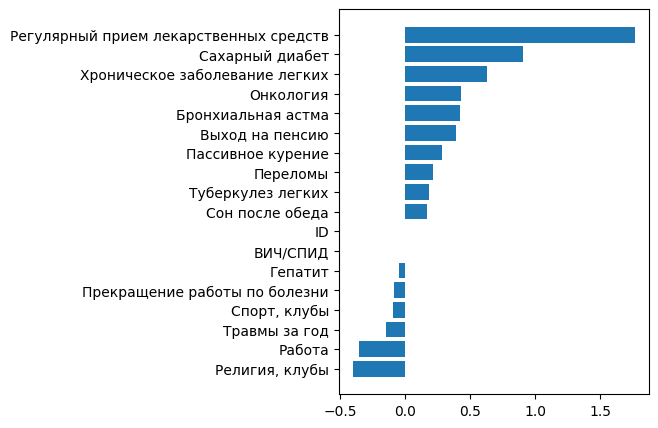

In [ ]:
importance = classifier.coef_[0]
plot_imp(features, importance)

Иногда удобнее посмотреть на абсолютный вклад признаков в предсказание.

ВИЧ/СПИД                       0.00000
ID                             0.00021
Гепатит                        0.05127
Прекращение работы по болезни  0.08532
Спорт, клубы                   0.09500
Травмы за год                  0.14477
Сон после обеда                0.16772
Туберкулез легких              0.18613
Переломы                       0.21357
Пассивное курение              0.28255
Работа                         0.35529
Выход на пенсию                0.39063
Религия, клубы                 0.40482
Бронхиальная астма             0.42343
Онкология                      0.42722
Хроническое заболевание легких 0.63013
Сахарный диабет                0.90538
Регулярный прием лекарственных средств 1.76475


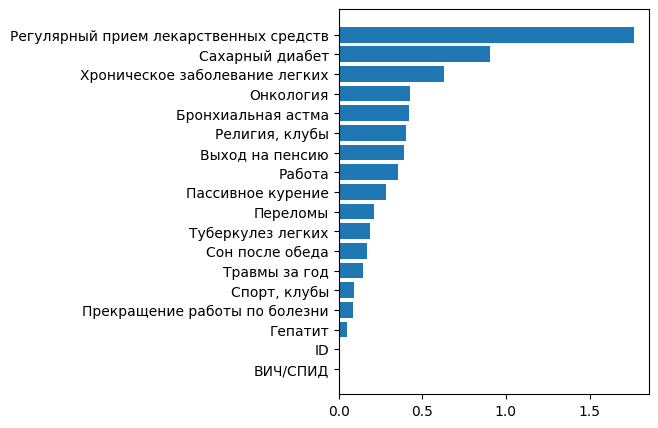

In [ ]:
plot_imp(features, np.abs(importance))

Можно заметить, что заведомо бесполезный признак `ID`, судя по коэффициентам регрессии, имеет важность около нуля. Действительно ли это из-за бесполезности признака или связано с чем-то другим?

Давайте поделим этот признак на константу, а все остальные признаки домножим на константу.

In [ ]:
train['ID'] /= 1000
train.loc[:, features.drop('ID')] *= 1000

А теперь обучим классификатор и проверим абсолютные значения коэффициентов.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ВИЧ/СПИД                       0.00000
Туберкулез легких              0.00005
Травмы за год                  0.00007
Гепатит                        0.00008
Спорт, клубы                   0.00009
Сон после обеда                0.00012
Прекращение работы по болезни  0.00018
Работа                         0.00022
Переломы                       0.00022
Пассивное курение              0.00023
Онкология                      0.00042
Выход на пенсию                0.00050
Бронхиальная астма             0.00054
Хроническое заболевание легких 0.00062
Религия, клубы                 0.00074
Сахарный диабет                0.00089
Регулярный прием лекарственных средств 0.00180
ID                             0.06141


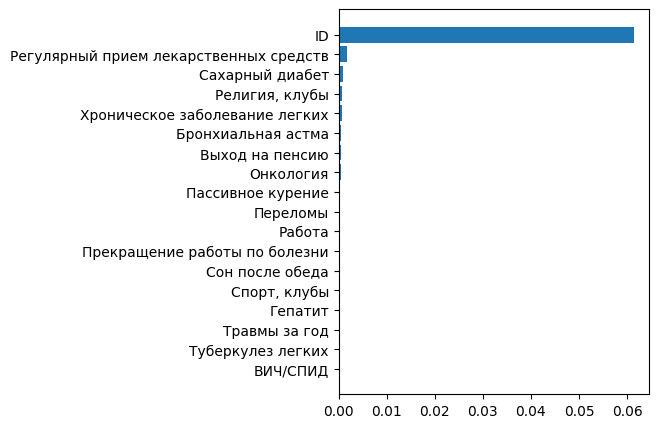

In [ ]:
classifier = LogisticRegression(random_state=42)
classifier.fit(train[features], train[target])
importance = classifier.coef_[0]
plot_imp(features, np.abs(importance))

Очевидно, что в линейной комбинации, если признак домножить на константу, то, поделив соответствующий вес на эту же константу, можно получить идентичный ответ (хотя это не выполняется относительно функции потерь, если на веса применена регуляризация). Поэтому сравнивать коэффициенты признаков с разными масштабами некорректно.

In [ ]:
train.describe()

,ID,Работа,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронхиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прием лекарственных средств,Травмы за год,Переломы,Пассивное курение,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,0.473026,519.633508,329.842932,51.047120,100.785340,113.874346,43.193717,73.298429,41.884817,19.633508,0.0,633.507853,51.047120,354.712042,232.984293,227.748691,69.371728,20.942408,0.467277,0.047120,0.124346,0.106021,0.094241
std,0.275381,499.941671,470.463898,220.238053,301.241487,317.866685,203.426117,260.796461,200.457164,138.828167,0.0,482.161743,220.238053,478.739384,423.009247,419.654304,254.251654,143.285368,0.499255,0.212035,0.330192,0.308066,0.292355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.471500,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.711250,1000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1000.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.953000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Избежать многих проблем нам поможет масштабирование признаков. Сейчас воспользуемся классом `StandardScaler`. Однако более детально про этот и другие методы масштабирования можете узнать по [ссылке](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

`StandardScaler` приводит матожидание всех признаков к нулю, а стандартное отклонение к единице.
$$z=\frac{X-\mu}{\sigma}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

Так же, как и алгоритмы машинного обучения, масштабирование необходимо производить с учетом разбиения на обучающую и отложенную выборки, чтобы избежать утечки данных. Какая информация о тестовой выборке нам будет известна, если этого не сделать?

In [ ]:
train, test = train_test_split(perfect_data,
                               train_size=0.8,
                               random_state=42,
                               shuffle=True,
                               stratify=perfect_data[target])

scaled_train_f = sc.fit_transform(train[features])
scaled_test_f = sc.transform(test[features])

Теперь взглянем на матожидание и стандартное отклонение признаков до и после стандартизации.

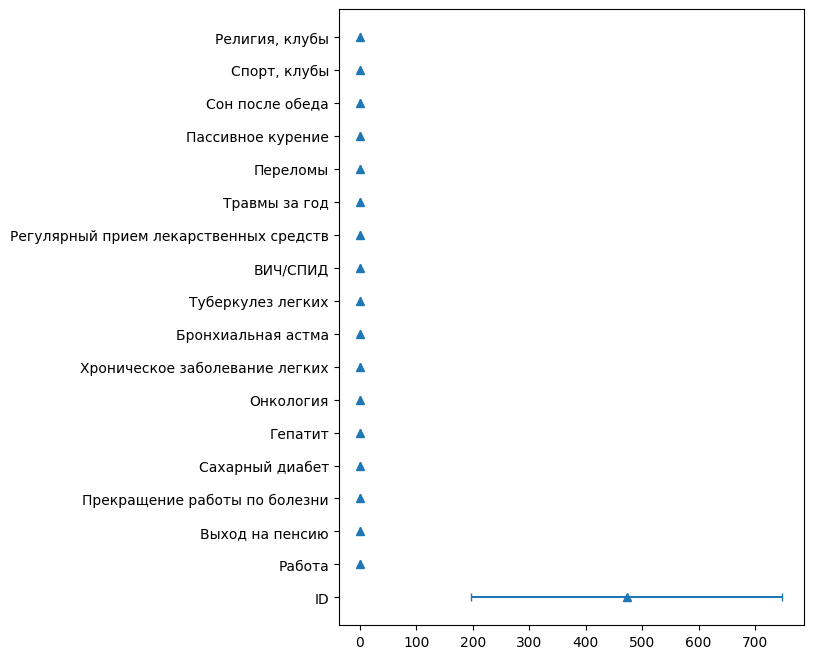

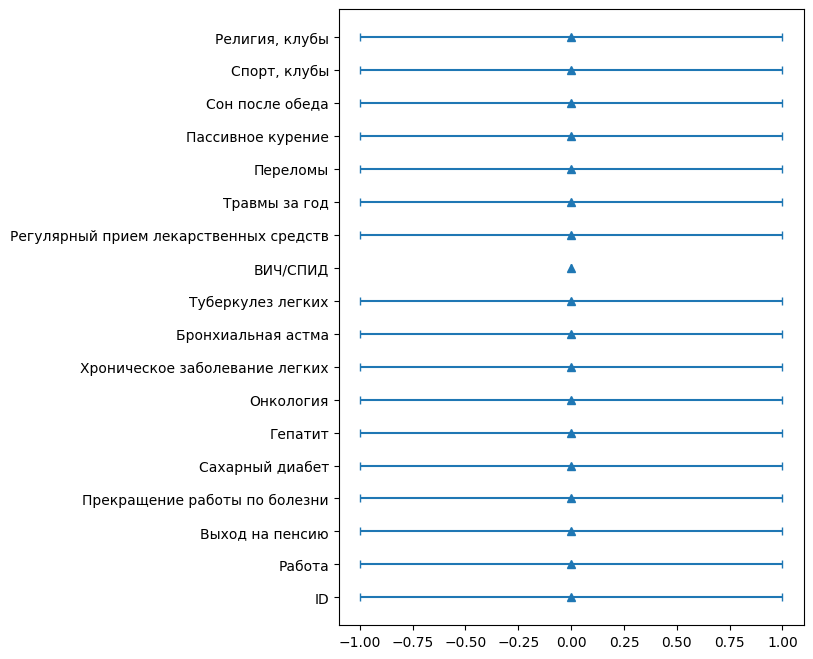

In [ ]:
plt.figure(figsize=(6, 8))
plt.errorbar(train[features].mean(axis=0), range(len(features)), xerr=train[features].std(axis=0),
             linestyle='None', marker='^', capsize=3)
plt.yticks(range(len(features)), features)
plt.show()
plt.figure(figsize=(6, 8))
plt.errorbar(scaled_train_f.mean(axis=0), range(len(features)), xerr=scaled_train_f.std(axis=0),
             linestyle='None', marker='^', capsize=3)
plt.yticks(range(len(features)), features)
plt.show()

In [ ]:
classifier = LogisticRegression(random_state=42)
classifier.fit(scaled_train_f, train[target]);

**Первое изменение**: алгоритм сошелся за предустановленное по умолчанию (`100`) количество шагов.

In [ ]:
train_preds = classifier.predict(scaled_train_f)
test_preds = classifier.predict(scaled_test_f)

print(f'Accuracy on train set           {accuracy_score(train[target], train_preds):.5f}')
print(f'Balanced Accuracy on train set  {balanced_accuracy_score(train[target], train_preds):.5f}')

print(f'Accuracy on test set           {accuracy_score(test[target], test_preds):.5f}')
print(f'Balanced Accuracy on test set  {balanced_accuracy_score(test[target], test_preds):.5f}')

Accuracy on train set           0.71859
Balanced Accuracy on train set  0.72021
Accuracy on test set           0.74346
Balanced Accuracy on test set  0.74835


**Второе изменение**: слегка выросло качество предсказаний.

Работа                         -0.12356
Религия, клубы                 -0.10751
Травмы за год                  -0.03025
Гепатит                        -0.02558
Спорт, клубы                   -0.02418
ВИЧ/СПИД                       0.00000
Прекращение работы по болезни  0.03567
Туберкулез легких              0.04732
Сон после обеда                0.05497
ID                             0.07033
Бронхиальная астма             0.09775
Пассивное курение              0.10111
Переломы                       0.11615
Онкология                      0.11776
Хроническое заболевание легких 0.15795
Выход на пенсию                0.23268
Сахарный диабет                0.26829
Регулярный прием лекарственных средств 0.86936


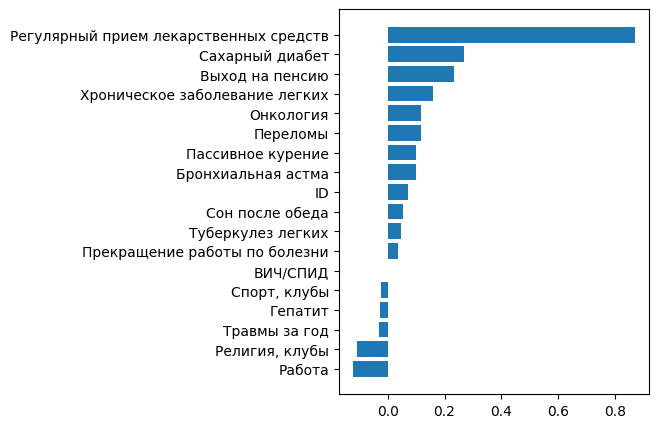

ВИЧ/СПИД                       0.00000
Спорт, клубы                   0.02418
Гепатит                        0.02558
Травмы за год                  0.03025
Прекращение работы по болезни  0.03567
Туберкулез легких              0.04732
Сон после обеда                0.05497
ID                             0.07033
Бронхиальная астма             0.09775
Пассивное курение              0.10111
Религия, клубы                 0.10751
Переломы                       0.11615
Онкология                      0.11776
Работа                         0.12356
Хроническое заболевание легких 0.15795
Выход на пенсию                0.23268
Сахарный диабет                0.26829
Регулярный прием лекарственных средств 0.86936


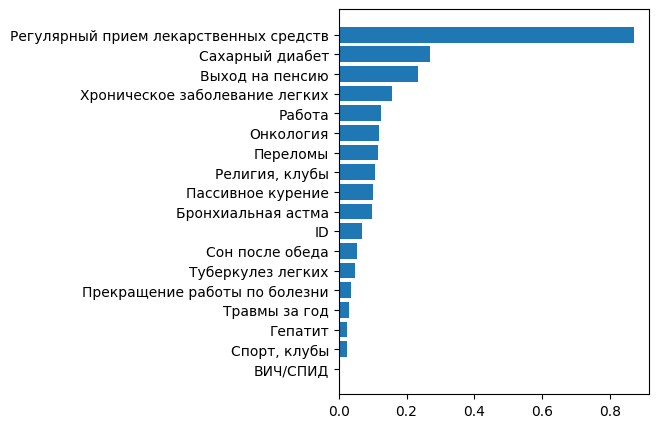

In [ ]:
importance = classifier.coef_[0]
plot_imp(features, importance)
plot_imp(features, np.abs(importance))

**Третье изменение**: вклады признаков теперь выглядят иначе. Однако, чтобы еще глубже оценить важность признаков необходимо еще изучить корреляции между ними. Подробнее об ошибках интерпретации коэффициентов регрессии можете почитать по [ссылке](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html).

Давайте попробуем добавить в модель признаки, которые мы отбросили.

Закодируем все признаки не относящиеся к `np.number` их популярностями. То есть, если какое-то значение признака встречалось `n` раз, то везде вместо значения этого признака будет использоваться число `n`. Несколько других способов кодирования категориальных признаков можете увидеть по [ссылке](https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/).

In [ ]:
for cat in data.select_dtypes(exclude=np.number):
    data[f'{cat}_enc'] = data[cat].map(data[cat].value_counts())

Пропущенные значения заполним `-1`

In [ ]:
numerical_data = data.select_dtypes(include=np.number)
imputed_data = numerical_data.fillna(-1)
features = imputed_data.columns.drop(targets)

In [ ]:
train, test = train_test_split(imputed_data,
                               train_size=0.8,
                               random_state=42,
                               shuffle=True,
                               stratify=imputed_data[target])
sc = StandardScaler()
scaled_train_f = sc.fit_transform(train[features])
scaled_test_f = sc.transform(test[features])
classifier = LogisticRegression(random_state=42)
classifier.fit(scaled_train_f, train[target])
train_preds = classifier.predict(scaled_train_f)
test_preds = classifier.predict(scaled_test_f)
print(f'Accuracy on train set           {accuracy_score(train[target], train_preds):.5f}')
print(f'Balanced Accuracy on train set  {balanced_accuracy_score(train[target], train_preds):.5f}')

print(f'Accuracy on test set           {accuracy_score(test[target], test_preds):.5f}')
print(f'Balanced Accuracy on test set  {balanced_accuracy_score(test[target], test_preds):.5f}')

Accuracy on train set           0.73560
Balanced Accuracy on train set  0.73722
Accuracy on test set           0.73298
Balanced Accuracy on test set  0.73854


Получаем неожиданный результат. Мы, вроде как, дали модели больше информации. Однако качество на отложенной выборке слегка упало. Что-то еще изменилось?

Алкоголь_enc                   -0.14515
Религия, клубы                 -0.13246
Профессия_enc                  -0.11332
Работа                         -0.06514
Время пробуждения_enc          -0.03880
Этнос_enc                      -0.02836
Семья_enc                      -0.02810
Гепатит                        -0.02090
Травмы за год                  -0.01983
Религия_enc                    -0.01049
Спорт, клубы                   -0.00841
ВИЧ/СПИД                       0.00000
Туберкулез легких              0.03596
Частота пасс кур_enc           0.03784
Национальность_enc             0.04174
Прекращение работы по болезни  0.04443
Сон после обеда                0.04837
Время засыпания_enc            0.05070
Возраст алког                  0.05208
ID                             0.05440
Возраст курения                0.05806
Пассивное курение              0.08045
Статус Курения_enc             0.09645
Онкология                      0.09976
Образование_enc                0.11120
Переломы      

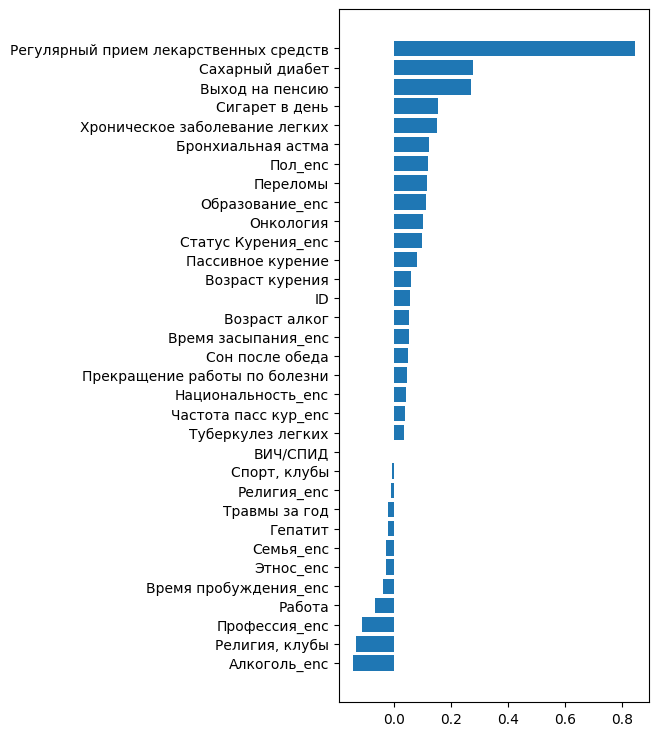

ВИЧ/СПИД                       0.00000
Спорт, клубы                   0.00841
Религия_enc                    0.01049
Травмы за год                  0.01983
Гепатит                        0.02090
Семья_enc                      0.02810
Этнос_enc                      0.02836
Туберкулез легких              0.03596
Частота пасс кур_enc           0.03784
Время пробуждения_enc          0.03880
Национальность_enc             0.04174
Прекращение работы по болезни  0.04443
Сон после обеда                0.04837
Время засыпания_enc            0.05070
Возраст алког                  0.05208
ID                             0.05440
Возраст курения                0.05806
Работа                         0.06514
Пассивное курение              0.08045
Статус Курения_enc             0.09645
Онкология                      0.09976
Образование_enc                0.11120
Профессия_enc                  0.11332
Переломы                       0.11717
Пол_enc                        0.11863
Бронхиальная астма       

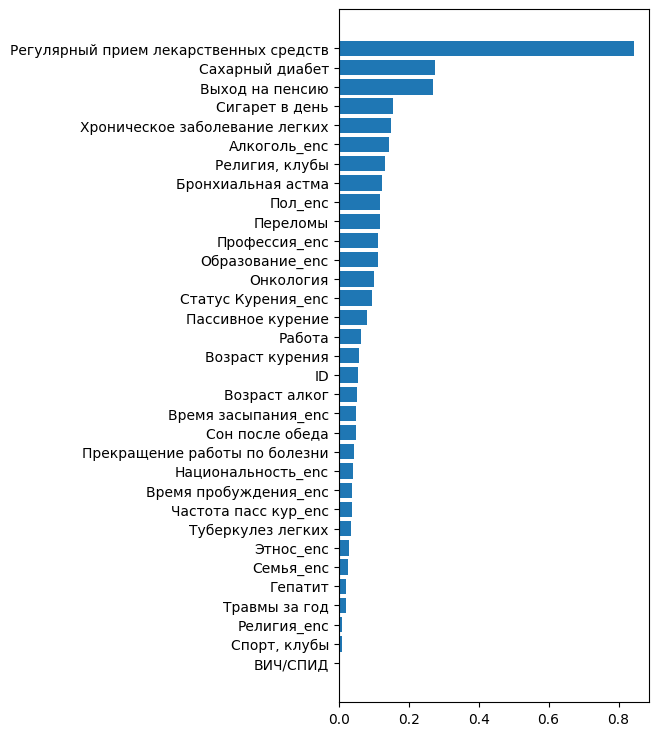

In [ ]:
importance = classifier.coef_[0]
plot_imp(features, importance)
plot_imp(features, np.abs(importance))

## Задание 1
1) Так же, как мы обучили модель для предсказания Артериальной гипертензии, обучите модель для предсказания Сердечной недостаточности.

2) Проверьте значения accuracy и balanced accuracy на отложенной выборке. Насколько велика разница в значениях и чем это обусловлено?

3) Подумайте, как улучшить вашу модель (наприм., подобрав гиперпараметры, иначе закодировав категориальны признаки, иначе заполнив пропущенные значения, сгенерировав новые признаки, отбросив вредные/неважные признаки) и доведите balanced accuracy до 0.7

4) Какие признаки оказались наиболее важными в вашем случае? Изучите вклад признаков в решение.


## Решение

## Задание 2
Возьмите набор фотографий кожных поражений. Он состоит из цветных изображений размером 64х64 принадлежащих 7 классам.  
Изучите баланс классов. Обучите логистическую регрессию для многоклассовой классификации.

In [ ]:
import os
from PIL import Image

IMGS_FOLDER = 'skin_data'

In [ ]:
classes = os.listdir(IMGS_FOLDER)
classes

`AKIEC` - actinic keratoses and intraepithelial carcinoma  
`BCC` - basal cell carcinoma  
`BKL` - benign keratosis-like lesions  
`DF` - dermatofibroma  
`MEL` - melanoma  
`NV` - melanocytic nevi  
`VASC` - vascular lesions

In [ ]:
imgs = []
targets = []
for lesion in os.listdir(IMGS_FOLDER):
    subfolder = os.path.join(IMGS_FOLDER, lesion)
    for img_name in os.listdir(subfolder):
        targets.append(lesion)
        with Image.open(os.path.join(subfolder, img_name)) as img:
            imgs.append(np.array(img))
imgs = np.array(imgs)
targets = np.array(targets)

Давайте визуализируем по одному изображению каждого класса.

In [ ]:
fig = plt.figure(figsize=(21, 3))
for idx, lesion in enumerate(classes):
    fig.add_subplot(1, 7, idx + 1)
    plt.imshow(imgs[targets == lesion][0])
    plt.axis('off')
    plt.title(lesion)
plt.show()

На данном этапе, если вы не дерматолог, проблематично будет придумать на глаз правила, по которым отличить один класс от другого.

Для многоклассовых предсказаний закодируем каждый класс своим числом. В этом нам поможет `LabelEncoder`.   
Как обучается модель для многоклассовых предсказаний мы с вами разберем на следующих занятиях.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
targets = LabelEncoder().fit_transform(targets)

In [ ]:
targets

Чтобы логистическая регрессия смогла принять изображения на вход, каждое из них нужно растянуть в вектор.   
Не забудьте нормализовать ваши данные и разбить на тренировочную и тестовую выборки.

## Решение